AttributeError: 'SquaredExponential' object has no attribute 'lengthscale'

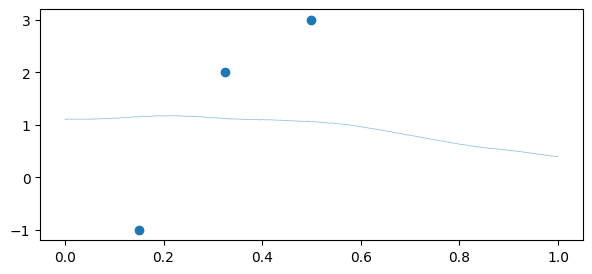

In [19]:
from botorch.utils import gp_sampling
from botorch.models.gp_regression import SingleTaskGP
import numpy as np
import torch
import matplotlib.pyplot as plt
from gpytorch.kernels import Matern52, Periodic, SquaredExponential

#kernel = Periodic(base_kernel=SquaredExponential())
freq = 200
lengthscale = 0.1
#kernel.period.assign((1 / freq) if freq != 0 else 1)
#kernel.base_kernel.lengthscales.assign(lengthscale)
noise2 = 1e-3  # measurement noise variance

xmin = 0.15  # range over which we observe
xmax = 0.50  # the behavior of a function $f$
X = torch.tensor(np.linspace(xmin, xmax, 3)[:, None], dtype=torch.float32)
y = torch.tensor(np.array([[-1], [2], [3]]), dtype=torch.float32)

model = SingleTaskGP(X, y)

model = gp_sampling.GPDraw(model)


Xnew = torch.tensor(np.linspace(0, 1, 1024)[:, None], dtype=torch.float32)

f_plot = model.forward(Xnew)


fig, ax = plt.subplots(figsize=(7, 3))


# Plot some sample paths
ax.scatter(X.detach().numpy(), y.detach().numpy())

ax.plot(Xnew.detach().numpy(), f_plot.detach().numpy(), alpha=0.5, linewidth=0.5, color='tab:blue')

gp_sampling.RandomFourierFeatures(SquaredExponential(), 3, 100)